## Project Introduction

### Problem Statement

The task involves analyzing historical trade data from various Binance accounts over a period of 90 days. The primary objective is to calculate key financial metrics for each account, rank them based on performance, and provide a list of the top 20 accounts. This analysis will provide insights into account performance and help identify the most profitable traders.

### Dataset Information

The dataset comprises:
- **Port_IDs**: Unique identifiers for accounts.
- **Trade_History**: Records of historical trades, including details like timestamp, asset, side (BUY/SELL), price, and more.

### Objectives

1. **Analyze the Dataset**:
   - Calculate key financial metrics for each account.
   - Rank the accounts based on these metrics.

2. **Metrics to Calculate**:
   - ROI (Return on Investment)
   - PnL (Profit and Loss)
   - Sharpe Ratio
   - MDD (Maximum Drawdown)
   - Win Rate
   - Win Positions
   - Total Positions

### Steps to Complete the Task

1. **Data Exploration and Cleaning**:
   - Load and inspect the dataset.
   - Handle missing values.

2. **Feature Engineering**:
   - Determine feature importance.
   - Create a scoring system with weighted scores.

3. **Ranking Algorithm**:
   - Develop an algorithm to rank accounts based on the calculated metrics.

4. **Documentation**:
   - Provide a concise report on methodology, findings, and assumptions.

### Deliverables

1. **Jupyter Notebook or Python Script**:
   - Complete analysis and code.

2. **CSV File**:
   - Containing calculated metrics.

3. **Top 20 Accounts List**:
   - Based on the ranking.

4. **Report**:
   - Detailing approach and findings.

### Additional Information

- **Win Positions**: Number of profitable positions.
- **Position Identification**:
  - Combine `side` and `positionSide` to classify trades (e.g., long_open, long_close).
  - `quantity` indicates money in the trade, `qty` indicates coin amount.
  - `realizedProfit` indicates profit or loss (depending on the sign).

# Steps to Proceed: Data Preprocessing

## 1. Import Libraries and Read Data
   - Load essential libraries (e.g., pandas, numpy, matplotlib, seaborn).
   - Read the dataset using pandas or another suitable library.

## 2. Sanity Check of the Dataset
   - Inspect the dataset for any inconsistencies or missing values.
   - Ensure that all necessary columns are present and correctly formatted.

## 3. Exploratory Data Analysis (EDA)
   - Perform initial data analysis to understand the dataset.
   - Visualize data distributions and identify potential relationships between variables.
   
## 4. Outliers Treatment (if Needed)
   - Detect and handle any outliers in the dataset that may affect analysis.
   - Consider techniques such as trimming, capping, or transformation.

## 5. Normalization
   - Apply normalization techniques to ensure data is scaled appropriately.
   - This could include Min-Max Scaling, Standardization, etc.

## 6. Encoding and Other Preprocessing Steps (if Needed)
   - Convert categorical variables into numerical formats if required.
   - Address any other preprocessing steps necessary to prepare the data for modeling.


# Importing Libraries and Dataset 

In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('TRADES_CopyTr_90D_ROI.csv')
df

,Port_IDs,Trade_History
0,3925368433214965504,"[{'time': 1718899656000, 'symbol': 'SOLUSDT', ..."
1,4002413037164645377,"[{'time': 1718980078000, 'symbol': 'NEARUSDT',..."
2,3923766029921022977,"[{'time': 1718677164000, 'symbol': 'ETHUSDT', ..."
3,3994879592543698688,"[{'time': 1718678214000, 'symbol': 'ETHUSDT', ..."
4,3926423286576838657,"[{'time': 1718979615000, 'symbol': 'ETHUSDT', ..."
...,...,...
145,4000222729738650369,"[{'time': 1718982068000, 'symbol': 'ARKMUSDT',..."
146,3998659472131949824,"[{'time': 1718979385000, 'symbol': 'BTCUSDT', ..."
147,4028701921959171840,"[{'time': 1718984241000, 'symbol': 'BTCUSDT', ..."
148,4014818740371615232,"[{'time': 1718983357000, 'symbol': 'SOLUSDT', ..."


In [5]:
df['Trade_History']

0      [{'time': 1718899656000, 'symbol': 'SOLUSDT', ...
1      [{'time': 1718980078000, 'symbol': 'NEARUSDT',...
2      [{'time': 1718677164000, 'symbol': 'ETHUSDT', ...
3      [{'time': 1718678214000, 'symbol': 'ETHUSDT', ...
4      [{'time': 1718979615000, 'symbol': 'ETHUSDT', ...
                             ...                        
145    [{'time': 1718982068000, 'symbol': 'ARKMUSDT',...
146    [{'time': 1718979385000, 'symbol': 'BTCUSDT', ...
147    [{'time': 1718984241000, 'symbol': 'BTCUSDT', ...
148    [{'time': 1718983357000, 'symbol': 'SOLUSDT', ...
149    [{'time': 1718977395000, 'symbol': 'BNBUSDT', ...
Name: Trade_History, Length: 150, dtype: object

# Sanity Check for the Dataset 

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Port_IDs,150.0,3.975655e+18,6.887470e+16,3.672755e+18,3.943672e+18,3.998616e+18,4.029508e+18,4.041860e+18


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Port_IDs       150 non-null    int64 
 1   Trade_History  149 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.5+ KB


In [8]:
df.isna().sum()

Port_IDs         0
Trade_History    1
dtype: int64

In [9]:
df['Trade_History'].isna().sum()

1

In [10]:
df['Trade_History'].duplicated().any()

False

In [11]:
df['Trade_History'][1]

"[{'time': 1718980078000, 'symbol': 'NEARUSDT', 'side': 'SELL', 'price': 5.344, 'fee': -0.138944, 'feeAsset': 'USDT', 'quantity': 277.888, 'quantityAsset': 'USDT', 'realizedProfit': 7.02899999, 'realizedProfitAsset': 'USDT', 'baseAsset': 'NEAR', 'qty': 52.0, 'positionSide': 'BOTH', 'activeBuy': False}, {'time': 1718976178000, 'symbol': 'NEARUSDT', 'side': 'BUY', 'price': 5.183, 'fee': -0.046647, 'feeAsset': 'USDT', 'quantity': 93.294, 'quantityAsset': 'USDT', 'realizedProfit': 0.0, 'realizedProfitAsset': 'USDT', 'baseAsset': 'NEAR', 'qty': 18.0, 'positionSide': 'BOTH', 'activeBuy': True}, {'time': 1718974114000, 'symbol': 'NEARUSDT', 'side': 'BUY', 'price': 5.212, 'fee': -0.00521199, 'feeAsset': 'USDT', 'quantity': 10.424, 'quantityAsset': 'USDT', 'realizedProfit': 0.0, 'realizedProfitAsset': 'USDT', 'baseAsset': 'NEAR', 'qty': 2.0, 'positionSide': 'BOTH', 'activeBuy': True}, {'time': 1718974114000, 'symbol': 'NEARUSDT', 'side': 'BUY', 'price': 5.212, 'fee': -0.033878, 'feeAsset': 'USD

# I tried a few approaches of my own, but I missed the quotes...

In [12]:
# df['User01'] = df['Trade_History'].str.extract('(\d+)', expand=True).where(df['Port_IDs'] == df['Port_IDs'][0])
# df['Time'] = df['Trade_History'].str.extract('(\d+)', expand=True)
# df['Symbol'] = df['Trade_History'].str.extract('([A-Z]+)', expand=True)
# df['Side'] = df['Trade_History'].str.extract('(BUY)', expand=True)
# df['Price'] = df['Trade_History'].str.extract('(\d+\.\d+)', expand=True)
# df['Fee'] = df['Trade_History'].str.extract('(\d\.\d+)', expand=True)


In [13]:
df

,Port_IDs,Trade_History
0,3925368433214965504,"[{'time': 1718899656000, 'symbol': 'SOLUSDT', ..."
1,4002413037164645377,"[{'time': 1718980078000, 'symbol': 'NEARUSDT',..."
2,3923766029921022977,"[{'time': 1718677164000, 'symbol': 'ETHUSDT', ..."
3,3994879592543698688,"[{'time': 1718678214000, 'symbol': 'ETHUSDT', ..."
4,3926423286576838657,"[{'time': 1718979615000, 'symbol': 'ETHUSDT', ..."
...,...,...
145,4000222729738650369,"[{'time': 1718982068000, 'symbol': 'ARKMUSDT',..."
146,3998659472131949824,"[{'time': 1718979385000, 'symbol': 'BTCUSDT', ..."
147,4028701921959171840,"[{'time': 1718984241000, 'symbol': 'BTCUSDT', ..."
148,4014818740371615232,"[{'time': 1718983357000, 'symbol': 'SOLUSDT', ..."


In [14]:
df.shape

(150, 2)

In [15]:
df.isna().sum()

Port_IDs         0
Trade_History    1
dtype: int64

In [16]:
df.dropna(subset=['Trade_History'],inplace=True)

In [17]:
df.isna().sum()


Port_IDs         0
Trade_History    0
dtype: int64

In [18]:
df

,Port_IDs,Trade_History
0,3925368433214965504,"[{'time': 1718899656000, 'symbol': 'SOLUSDT', ..."
1,4002413037164645377,"[{'time': 1718980078000, 'symbol': 'NEARUSDT',..."
2,3923766029921022977,"[{'time': 1718677164000, 'symbol': 'ETHUSDT', ..."
3,3994879592543698688,"[{'time': 1718678214000, 'symbol': 'ETHUSDT', ..."
4,3926423286576838657,"[{'time': 1718979615000, 'symbol': 'ETHUSDT', ..."
...,...,...
145,4000222729738650369,"[{'time': 1718982068000, 'symbol': 'ARKMUSDT',..."
146,3998659472131949824,"[{'time': 1718979385000, 'symbol': 'BTCUSDT', ..."
147,4028701921959171840,"[{'time': 1718984241000, 'symbol': 'BTCUSDT', ..."
148,4014818740371615232,"[{'time': 1718983357000, 'symbol': 'SOLUSDT', ..."


In [19]:
# df.drop(columns=['User01', 'Fee','Time', 'Symbol',"Side",'Price', 'Fee'])

In [20]:
atta = {
    'ID': [1, 2],
    'Data': [[{'a': 1, 'b': 2}, {'a': 3, 'b': 4}], [{'a': 5, 'b': 6}, {'a': 7, 'b': 8}]]
}

sample = pd.DataFrame(atta)
sample

,ID,Data
0,1,"[{'a': 1, 'b': 2}, {'a': 3, 'b': 4}]"
1,2,"[{'a': 5, 'b': 6}, {'a': 7, 'b': 8}]"


# Using Explode method to create features wrt to ID --> Feature Engineering

In [21]:
sample_ex = sample.explode('Data')

print(sample_ex)

   ID              Data
0   1  {'a': 1, 'b': 2}
0   1  {'a': 3, 'b': 4}
1   2  {'a': 5, 'b': 6}
1   2  {'a': 7, 'b': 8}


In [22]:
sample_norm = pd.json_normalize(sample_ex['Data'])
sample_data = sample_ex.drop(columns=['Data']).reset_index(drop=True).join(sample_norm.reset_index(drop=True))

print(sample_data)


   ID  a  b
0   1  1  2
1   1  3  4
2   2  5  6
3   2  7  8


In [23]:
# col_json = df['Trade_History'].to_json()
# col_json

In [24]:
df_exploded = df.explode('Trade_History', ignore_index=True)

In [25]:
df_exploded

,Port_IDs,Trade_History
0,3925368433214965504,"[{'time': 1718899656000, 'symbol': 'SOLUSDT', ..."
1,4002413037164645377,"[{'time': 1718980078000, 'symbol': 'NEARUSDT',..."
2,3923766029921022977,"[{'time': 1718677164000, 'symbol': 'ETHUSDT', ..."
3,3994879592543698688,"[{'time': 1718678214000, 'symbol': 'ETHUSDT', ..."
4,3926423286576838657,"[{'time': 1718979615000, 'symbol': 'ETHUSDT', ..."
...,...,...
144,4000222729738650369,"[{'time': 1718982068000, 'symbol': 'ARKMUSDT',..."
145,3998659472131949824,"[{'time': 1718979385000, 'symbol': 'BTCUSDT', ..."
146,4028701921959171840,"[{'time': 1718984241000, 'symbol': 'BTCUSDT', ..."
147,4014818740371615232,"[{'time': 1718983357000, 'symbol': 'SOLUSDT', ..."


In [26]:
df

,Port_IDs,Trade_History
0,3925368433214965504,"[{'time': 1718899656000, 'symbol': 'SOLUSDT', ..."
1,4002413037164645377,"[{'time': 1718980078000, 'symbol': 'NEARUSDT',..."
2,3923766029921022977,"[{'time': 1718677164000, 'symbol': 'ETHUSDT', ..."
3,3994879592543698688,"[{'time': 1718678214000, 'symbol': 'ETHUSDT', ..."
4,3926423286576838657,"[{'time': 1718979615000, 'symbol': 'ETHUSDT', ..."
...,...,...
145,4000222729738650369,"[{'time': 1718982068000, 'symbol': 'ARKMUSDT',..."
146,3998659472131949824,"[{'time': 1718979385000, 'symbol': 'BTCUSDT', ..."
147,4028701921959171840,"[{'time': 1718984241000, 'symbol': 'BTCUSDT', ..."
148,4014818740371615232,"[{'time': 1718983357000, 'symbol': 'SOLUSDT', ..."


In [27]:
df['Trade_History'] =  df['Trade_History'].explode()

In [28]:
df.explode('Trade_History')

,Port_IDs,Trade_History
0,3925368433214965504,"[{'time': 1718899656000, 'symbol': 'SOLUSDT', ..."
1,4002413037164645377,"[{'time': 1718980078000, 'symbol': 'NEARUSDT',..."
2,3923766029921022977,"[{'time': 1718677164000, 'symbol': 'ETHUSDT', ..."
3,3994879592543698688,"[{'time': 1718678214000, 'symbol': 'ETHUSDT', ..."
4,3926423286576838657,"[{'time': 1718979615000, 'symbol': 'ETHUSDT', ..."
...,...,...
145,4000222729738650369,"[{'time': 1718982068000, 'symbol': 'ARKMUSDT',..."
146,3998659472131949824,"[{'time': 1718979385000, 'symbol': 'BTCUSDT', ..."
147,4028701921959171840,"[{'time': 1718984241000, 'symbol': 'BTCUSDT', ..."
148,4014818740371615232,"[{'time': 1718983357000, 'symbol': 'SOLUSDT', ..."


# The column stayed the same, but the string got me stuck for a while. No problem, though.

In [29]:
df['Trade_History'][0]

"[{'time': 1718899656000, 'symbol': 'SOLUSDT', 'side': 'BUY', 'price': 132.537, 'fee': -0.9940275, 'feeAsset': 'USDT', 'quantity': 1988.055, 'quantityAsset': 'USDT', 'realizedProfit': 0.0, 'realizedProfitAsset': 'USDT', 'baseAsset': 'SOL', 'qty': 15.0, 'positionSide': 'LONG', 'activeBuy': True}, {'time': 1718899618000, 'symbol': 'DOGEUSDT', 'side': 'BUY', 'price': 0.12182, 'fee': -0.27979617, 'feeAsset': 'USDT', 'quantity': 1398.98088, 'quantityAsset': 'USDT', 'realizedProfit': 0.0, 'realizedProfitAsset': 'USDT', 'baseAsset': 'DOGE', 'qty': 11484.0, 'positionSide': 'LONG', 'activeBuy': False}, {'time': 1718899618000, 'symbol': 'DOGEUSDT', 'side': 'BUY', 'price': 0.12182, 'fee': -0.03949404, 'feeAsset': 'USDT', 'quantity': 197.47022, 'quantityAsset': 'USDT', 'realizedProfit': 0.0, 'realizedProfitAsset': 'USDT', 'baseAsset': 'DOGE', 'qty': 1621.0, 'positionSide': 'LONG', 'activeBuy': False}, {'time': 1718899616000, 'symbol': 'DOGEUSDT', 'side': 'BUY', 'price': 0.12182, 'fee': -0.00828375

# Using the Abstract Syntax Tree (AST), I was able to directly transform the string data into a list.

In [30]:
import ast
df['Trade_History'] = df['Trade_History'].apply(ast.literal_eval)

In [31]:
df_exploded = df.explode('Trade_History')

In [32]:
df_exploded

,Port_IDs,Trade_History
0,3925368433214965504,"{'time': 1718899656000, 'symbol': 'SOLUSDT', '..."
0,3925368433214965504,"{'time': 1718899618000, 'symbol': 'DOGEUSDT', ..."
0,3925368433214965504,"{'time': 1718899618000, 'symbol': 'DOGEUSDT', ..."
0,3925368433214965504,"{'time': 1718899616000, 'symbol': 'DOGEUSDT', ..."
0,3925368433214965504,"{'time': 1718899616000, 'symbol': 'DOGEUSDT', ..."
...,...,...
149,3768170840939476993,"{'time': 1718549875000, 'symbol': 'JASMYUSDT',..."
149,3768170840939476993,"{'time': 1718549875000, 'symbol': 'JASMYUSDT',..."
149,3768170840939476993,"{'time': 1718549875000, 'symbol': 'JASMYUSDT',..."
149,3768170840939476993,"{'time': 1718549875000, 'symbol': 'JASMYUSDT',..."


In [33]:
df_normalized = pd.json_normalize(df_exploded['Trade_History'])

In [34]:
df_normalized

,time,symbol,side,price,fee,feeAsset,quantity,quantityAsset,realizedProfit,realizedProfitAsset,baseAsset,qty,positionSide,activeBuy
0,1718899656000,SOLUSDT,BUY,132.537000,-0.994027,USDT,1988.055000,USDT,0.0,USDT,SOL,15.0,LONG,True
1,1718899618000,DOGEUSDT,BUY,0.121820,-0.279796,USDT,1398.980880,USDT,0.0,USDT,DOGE,11484.0,LONG,False
2,1718899618000,DOGEUSDT,BUY,0.121820,-0.039494,USDT,197.470220,USDT,0.0,USDT,DOGE,1621.0,LONG,False
3,1718899616000,DOGEUSDT,BUY,0.121820,-0.008284,USDT,16.567520,USDT,0.0,USDT,DOGE,136.0,LONG,True
4,1718899616000,DOGEUSDT,BUY,0.121820,-0.046109,USDT,92.217740,USDT,0.0,USDT,DOGE,757.0,LONG,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211272,1718549875000,JASMYUSDT,SELL,0.035968,-0.025070,USDT,50.139392,USDT,0.0,USDT,JASMY,1394.0,BOTH,False
211273,1718549875000,JASMYUSDT,SELL,0.035968,-0.008255,USDT,16.509312,USDT,0.0,USDT,JASMY,459.0,BOTH,False
211274,1718549875000,JASMYUSDT,SELL,0.035969,-0.031545,USDT,63.089626,USDT,0.0,USDT,JASMY,1754.0,BOTH,False
211275,1718549875000,JASMYUSDT,SELL,0.035969,-0.031905,USDT,63.809006,USDT,0.0,USDT,JASMY,1774.0,BOTH,False


In [35]:
df_final = df_exploded.drop(columns=['Trade_History']).reset_index(drop=True).join(df_normalized.reset_index(drop=True))

df_final

,Port_IDs,time,symbol,side,price,fee,feeAsset,quantity,quantityAsset,realizedProfit,realizedProfitAsset,baseAsset,qty,positionSide,activeBuy
0,3925368433214965504,1718899656000,SOLUSDT,BUY,132.537000,-0.994027,USDT,1988.055000,USDT,0.0,USDT,SOL,15.0,LONG,True
1,3925368433214965504,1718899618000,DOGEUSDT,BUY,0.121820,-0.279796,USDT,1398.980880,USDT,0.0,USDT,DOGE,11484.0,LONG,False
2,3925368433214965504,1718899618000,DOGEUSDT,BUY,0.121820,-0.039494,USDT,197.470220,USDT,0.0,USDT,DOGE,1621.0,LONG,False
3,3925368433214965504,1718899616000,DOGEUSDT,BUY,0.121820,-0.008284,USDT,16.567520,USDT,0.0,USDT,DOGE,136.0,LONG,True
4,3925368433214965504,1718899616000,DOGEUSDT,BUY,0.121820,-0.046109,USDT,92.217740,USDT,0.0,USDT,DOGE,757.0,LONG,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211272,3768170840939476993,1718549875000,JASMYUSDT,SELL,0.035968,-0.025070,USDT,50.139392,USDT,0.0,USDT,JASMY,1394.0,BOTH,False
211273,3768170840939476993,1718549875000,JASMYUSDT,SELL,0.035968,-0.008255,USDT,16.509312,USDT,0.0,USDT,JASMY,459.0,BOTH,False
211274,3768170840939476993,1718549875000,JASMYUSDT,SELL,0.035969,-0.031545,USDT,63.089626,USDT,0.0,USDT,JASMY,1754.0,BOTH,False
211275,3768170840939476993,1718549875000,JASMYUSDT,SELL,0.035969,-0.031905,USDT,63.809006,USDT,0.0,USDT,JASMY,1774.0,BOTH,False


In [36]:
df_data = df_final.copy()

In [37]:
df_data

,Port_IDs,time,symbol,side,price,fee,feeAsset,quantity,quantityAsset,realizedProfit,realizedProfitAsset,baseAsset,qty,positionSide,activeBuy
0,3925368433214965504,1718899656000,SOLUSDT,BUY,132.537000,-0.994027,USDT,1988.055000,USDT,0.0,USDT,SOL,15.0,LONG,True
1,3925368433214965504,1718899618000,DOGEUSDT,BUY,0.121820,-0.279796,USDT,1398.980880,USDT,0.0,USDT,DOGE,11484.0,LONG,False
2,3925368433214965504,1718899618000,DOGEUSDT,BUY,0.121820,-0.039494,USDT,197.470220,USDT,0.0,USDT,DOGE,1621.0,LONG,False
3,3925368433214965504,1718899616000,DOGEUSDT,BUY,0.121820,-0.008284,USDT,16.567520,USDT,0.0,USDT,DOGE,136.0,LONG,True
4,3925368433214965504,1718899616000,DOGEUSDT,BUY,0.121820,-0.046109,USDT,92.217740,USDT,0.0,USDT,DOGE,757.0,LONG,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211272,3768170840939476993,1718549875000,JASMYUSDT,SELL,0.035968,-0.025070,USDT,50.139392,USDT,0.0,USDT,JASMY,1394.0,BOTH,False
211273,3768170840939476993,1718549875000,JASMYUSDT,SELL,0.035968,-0.008255,USDT,16.509312,USDT,0.0,USDT,JASMY,459.0,BOTH,False
211274,3768170840939476993,1718549875000,JASMYUSDT,SELL,0.035969,-0.031545,USDT,63.089626,USDT,0.0,USDT,JASMY,1754.0,BOTH,False
211275,3768170840939476993,1718549875000,JASMYUSDT,SELL,0.035969,-0.031905,USDT,63.809006,USDT,0.0,USDT,JASMY,1774.0,BOTH,False


In [38]:
df.isna().sum()

Port_IDs         0
Trade_History    0
dtype: int64

# Data preprocessing

In [39]:
import seaborn as sns 
import matplotlib.pyplot as plt

In [40]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211277 entries, 0 to 211276
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Port_IDs             211277 non-null  int64  
 1   time                 211277 non-null  int64  
 2   symbol               211277 non-null  object 
 3   side                 211277 non-null  object 
 4   price                211277 non-null  float64
 5   fee                  211277 non-null  float64
 6   feeAsset             211277 non-null  object 
 7   quantity             211277 non-null  float64
 8   quantityAsset        211277 non-null  object 
 9   realizedProfit       211277 non-null  float64
 10  realizedProfitAsset  211277 non-null  object 
 11  baseAsset            211277 non-null  object 
 12  qty                  211277 non-null  float64
 13  positionSide         211277 non-null  object 
 14  activeBuy            211277 non-null  bool   
dtypes: bool(1), float

In [41]:
import datetime

def convert_timestamp(trade_history):
    timestamp_ms = trade_history
    timestamp_s = timestamp_ms / 1000
    trade_history = datetime.datetime.fromtimestamp(timestamp_s).strftime('%Y-%m-%d %H:%M:%S')
    return trade_history

In [42]:
# df_data[df_data['Port_IDs'] == 3925368433214965504]

In [43]:
df_data['time'] = df_data['time'].apply(convert_timestamp)

In [44]:
df_data['time'].dtypes

dtype('O')

In [45]:
df_data['time'] = df_data['time'].astype('datetime64[ns]')

In [46]:
df_data['time'].dtype

dtype('<M8[ns]')

In [47]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211277 entries, 0 to 211276
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Port_IDs             211277 non-null  int64         
 1   time                 211277 non-null  datetime64[ns]
 2   symbol               211277 non-null  object        
 3   side                 211277 non-null  object        
 4   price                211277 non-null  float64       
 5   fee                  211277 non-null  float64       
 6   feeAsset             211277 non-null  object        
 7   quantity             211277 non-null  float64       
 8   quantityAsset        211277 non-null  object        
 9   realizedProfit       211277 non-null  float64       
 10  realizedProfitAsset  211277 non-null  object        
 11  baseAsset            211277 non-null  object        
 12  qty                  211277 non-null  float64       
 13  positionSide  

In [48]:
df_data.select_dtypes('number').count()

Port_IDs          211277
price             211277
fee               211277
quantity          211277
realizedProfit    211277
qty               211277
dtype: int64


### Explanation of Header:

---

**Port_IDs**: The unique identifier for the portfolio or transaction.

Examples: `3925368433214965504`, `3925368433214965504`

**time**: The timestamp of the transaction. It is usually in milliseconds since the epoch (Unix time).

Examples: `1718899656000`, `1718899618000`

**symbol**: The trading pair symbol, indicating the asset being traded.

Examples: `SOLUSDT` (Solana/USDT), `DOGEUSDT` (Dogecoin/USDT)

**side**: The direction of the trade, indicating whether it is a buy or sell.

Examples: `BUY`, `BUY`

**price**: The price at which the asset was traded.

Examples: `132.537000`, `0.121820`

**fee**: The fee paid for the transaction.

Examples: `-0.994027`, `-0.279796`

**feeAsset**: The asset in which the fee is paid.

Examples: `USDT`, `USDT`

**quantity**: The quantity of the asset traded.

Examples: `1988.055000`, `1398.980880`

**quantityAsset**: The asset in which the quantity is specified.

Examples: `USDT`, `USDT`

**realizedProfit**: The profit or loss realized from the transaction.

Examples: `0.0`, `0.0`

**realizedProfitAsset**: The asset in which the realized profit is measured.

Examples: `USDT`, `USDT`

**baseAsset**: The base asset in the trading pair.

Examples: `SOL`, `DOGE`

**qty**: The quantity of the base asset traded.

Examples: `15.0`, `11484.0`

**positionSide**: The position side of the trade, indicating whether it is a long or short eosition.

Examples: `LONG`, `LON`

**activeBuy**: Indicate
s understanding the headers and their corresponding values clearly.

# Exploratory Data Analysis (EDA)

## The bar plot indicates that most data points contain outliers due to skewness.  
### 
- Several values fall outside the **Interquartile Range (IQR)**, with some being significantly diminished. ###  
- The data exhibits **high bias**, with a substantial volume, quantity, and profit distribution.

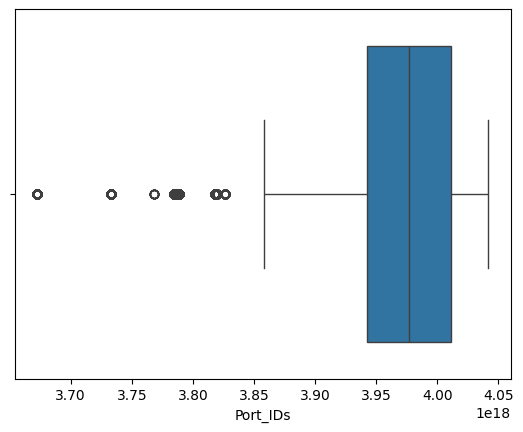

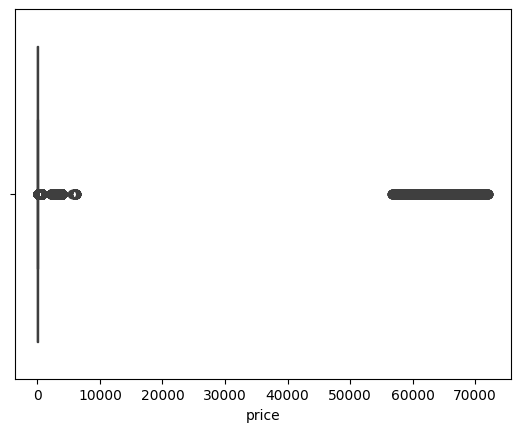

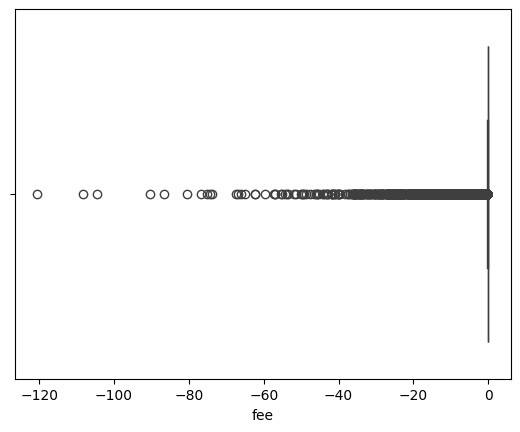

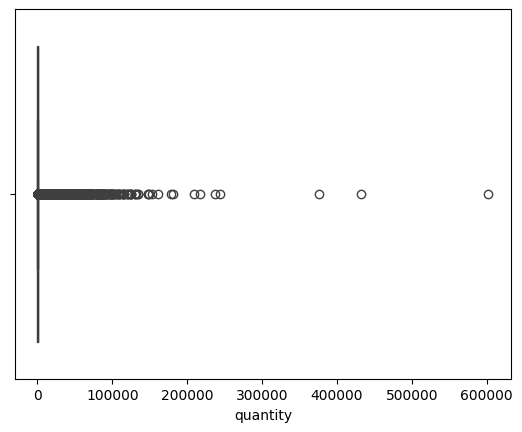

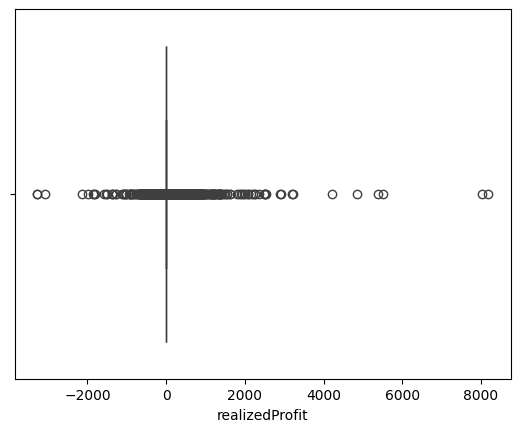

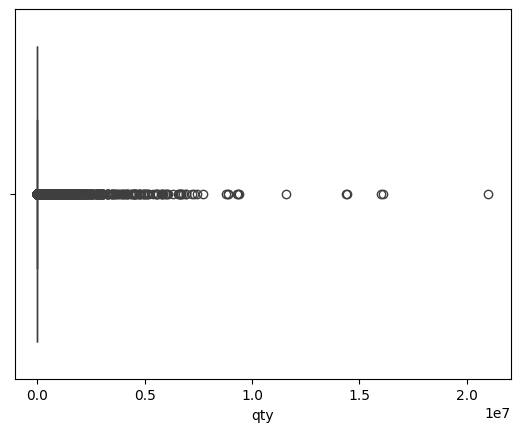

In [49]:
for i in df_data.select_dtypes('number'):
    sns.boxplot(data = df_data, x=df_data[i])
    plt.show()

## We can treat the Outliners but will have to lose data 

In [50]:
df_data.select_dtypes('number').corr()

,Port_IDs,price,fee,quantity,realizedProfit,qty
Port_IDs,1.000000,0.073624,-0.089159,0.085855,0.016976,0.026861
price,0.073624,1.000000,-0.308489,0.289872,0.068045,-0.018755
fee,-0.089159,-0.308489,1.000000,-0.912321,-0.206339,-0.030772
quantity,0.085855,0.289872,-0.912321,1.000000,0.215004,0.048192
realizedProfit,0.016976,0.068045,-0.206339,0.215004,1.000000,0.018010
qty,0.026861,-0.018755,-0.030772,0.048192,0.018010,1.000000


---

- **Price, quantity, and realized profit** exhibit high skewness, indicating that a few extreme values heavily influence the dataset.  
- A **high standard deviation** suggests significant profit variation among users and substantial price fluctuations.  
- **Negative fees** represent rebates.

In [51]:
df_data.select_dtypes('number').describe().T

,count,mean,std,min,25%,50%,75%,max
Port_IDs,211277.0,3.964346e+18,6.102597e+16,3.672755e+18,3.942631e+18,3.977117e+18,4.011627e+18,4.041860e+18
price,211277.0,4.129040e+03,1.536353e+04,1.581000e-04,1.438300e-01,2.483300e+00,4.462100e+01,7.210500e+04
fee,211277.0,-3.827867e-01,1.793858e+00,-1.204587e+02,-1.798678e-01,-5.173200e-02,-9.454490e-03,0.000000e+00
quantity,211277.0,9.755095e+02,4.667099e+03,6.694000e-03,2.334091e+01,1.277750e+02,4.040120e+02,6.022933e+05
realizedProfit,211277.0,3.270818e+00,5.789510e+01,-3.269194e+03,0.000000e+00,0.000000e+00,5.775900e-01,8.186254e+03
qty,211277.0,1.090626e+04,1.562781e+05,1.000000e-03,2.000000e+00,2.600000e+01,5.790000e+02,2.100000e+07


# The data is highly skewed, requiring a log scale for better visualization of its distribution.

## Key Takeaways:

1. **Transactions occur in high volume.**
2. **Profit variation across users is irregular.**
3. **Assets are traded at extremely high rates.**

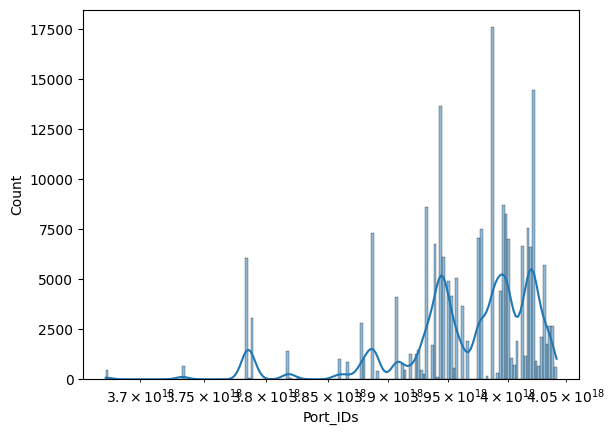

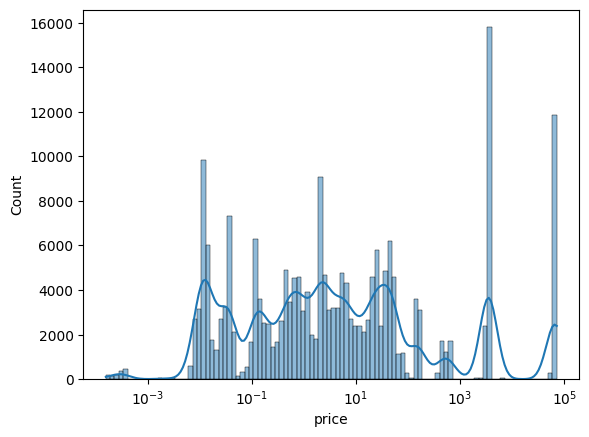

C:\Users\vishn\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


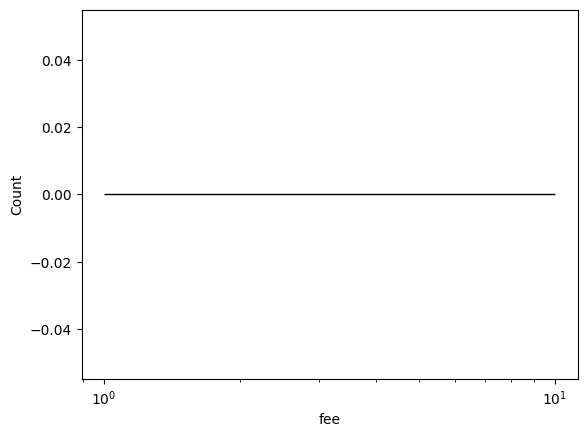

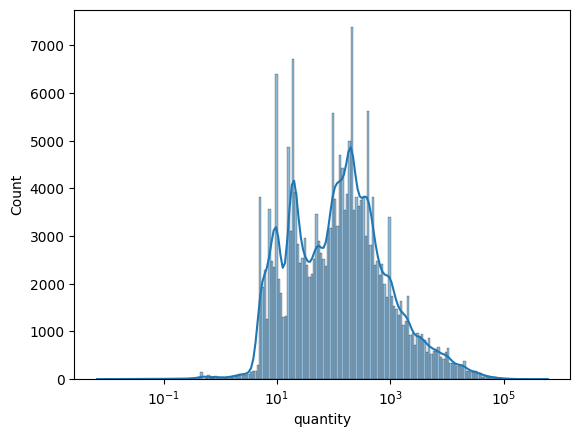

C:\Users\vishn\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


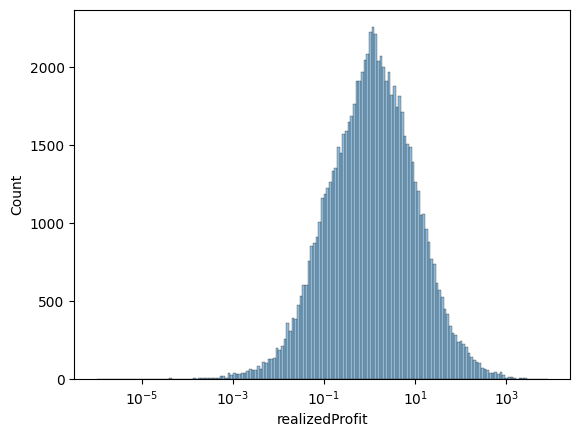

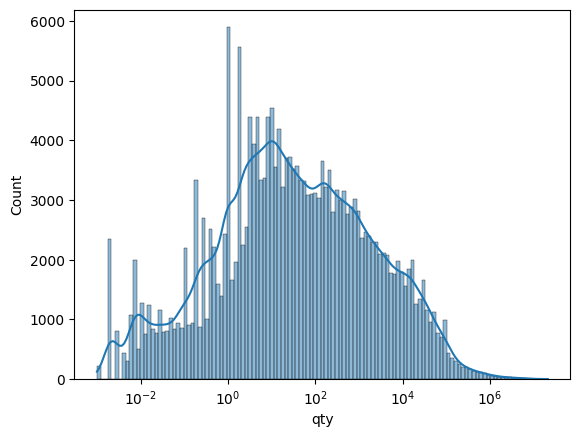

In [52]:
for i in df_data.select_dtypes('number'):
    sns.histplot(data = df_data, x=df_data[i], log_scale=True, kde=True )
    plt.show()

## Numerical Columns from this dataset 

In [53]:
df_data.select_dtypes('number').columns

Index(['Port_IDs', 'price', 'fee', 'quantity', 'realizedProfit', 'qty'], dtype='object')

## Exploring the relationship between potential numerical columns and profit using scatter plots.

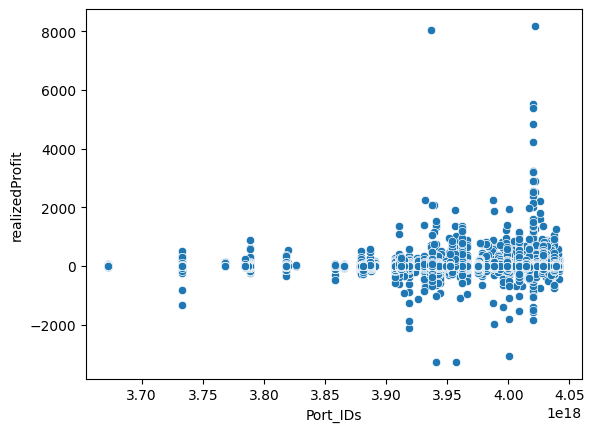

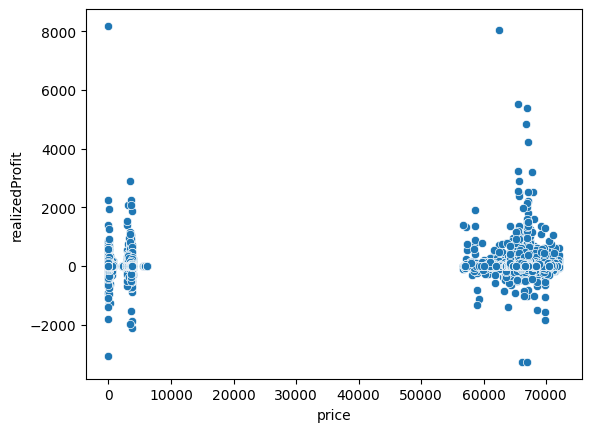

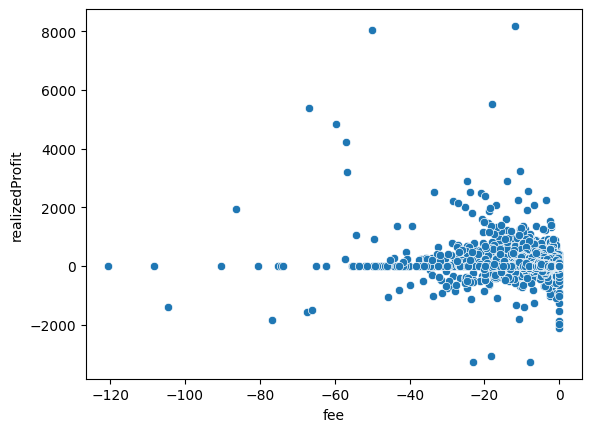

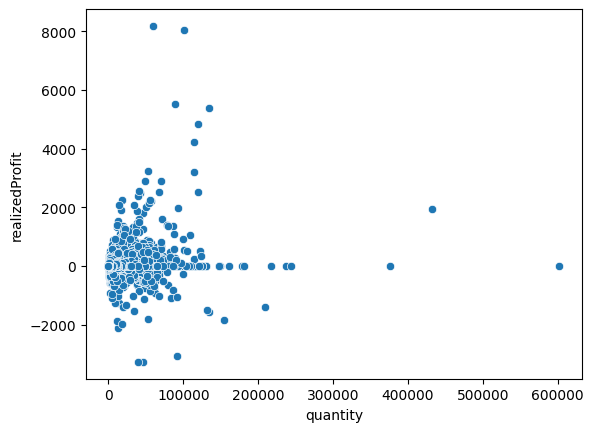

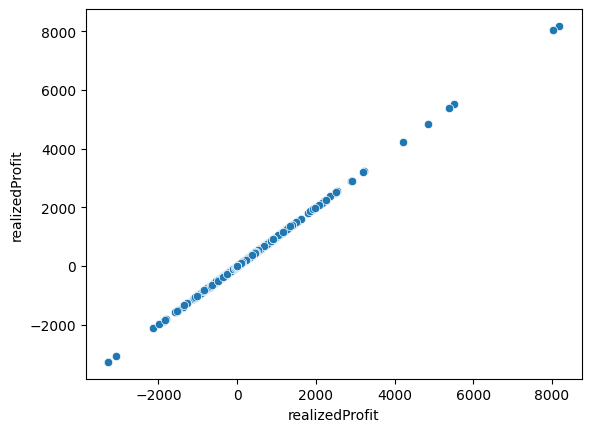

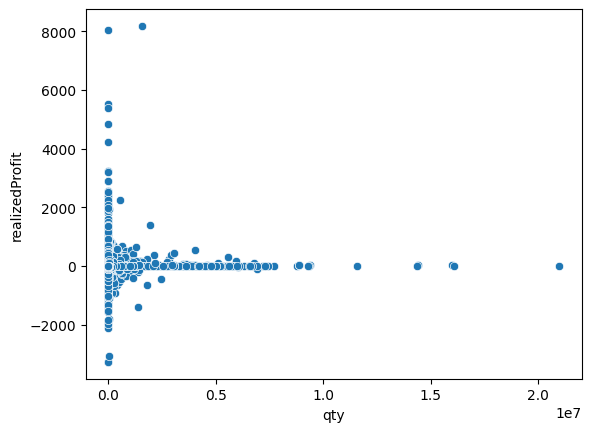

In [54]:
for i in df_data.select_dtypes('number'):
    sns.scatterplot(data = df_data, x=df_data[i], y=df_data['realizedProfit'], legend="brief")
    plt.show()

## Users purchase high volumes of coins at lower prices, while the volume is moderate for higher-priced coins.


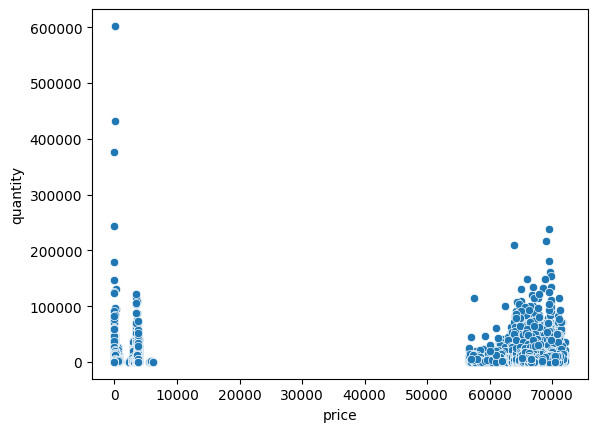

In [55]:
sns.scatterplot(data = df_data, x=df_data['price'], y=df_data['quantity'], legend="brief")
plt.show()

## Users tend to purchase high-priced coins in large volumes, as well as low-priced coins.
 

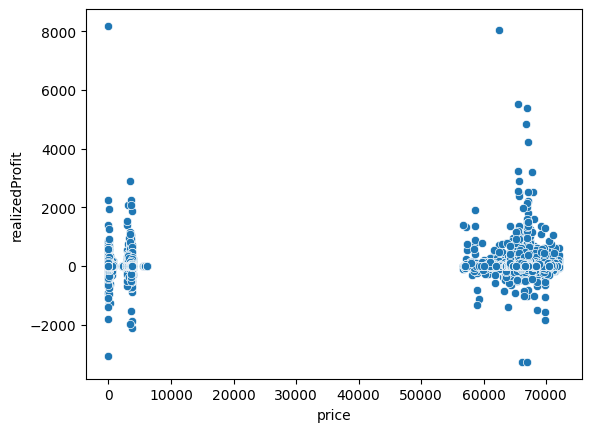

In [56]:
sns.scatterplot(data = df_data, x=df_data['price'], y=df_data['realizedProfit'], legend="brief")
plt.show()

## List of all Categorical columns 


In [57]:
df_data.select_dtypes('object').columns

Index(['symbol', 'side', 'feeAsset', 'quantityAsset', 'realizedProfitAsset',
       'baseAsset', 'positionSide'],
      dtype='object')

## Most Traded Base Asset(Coin) in the given Trading History

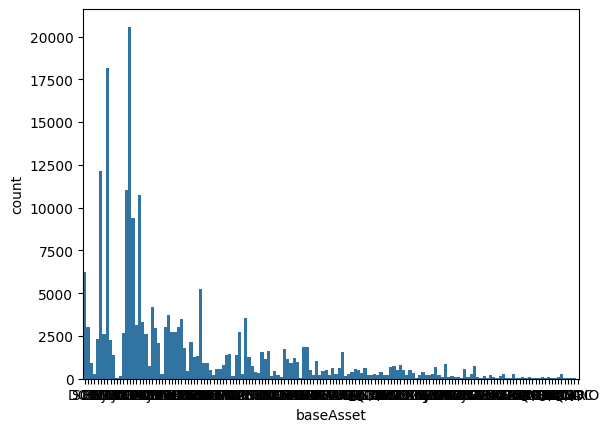

In [58]:
sns.countplot(data= df_data, x= df_data['baseAsset'], width=1.0 ,orient='vertical',order=df_data['baseAsset'], native_scale=True)
plt.show()

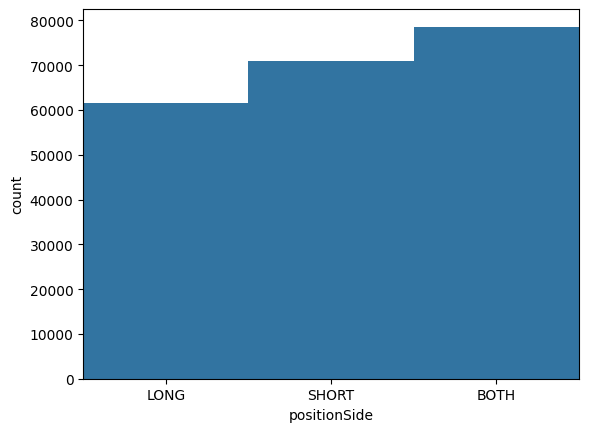

In [59]:
sns.countplot(data= df_data, x= df_data['positionSide'], width=1.0, orient='x')
plt.show()

# In the trading history, users tend to prioritize buying over selling.

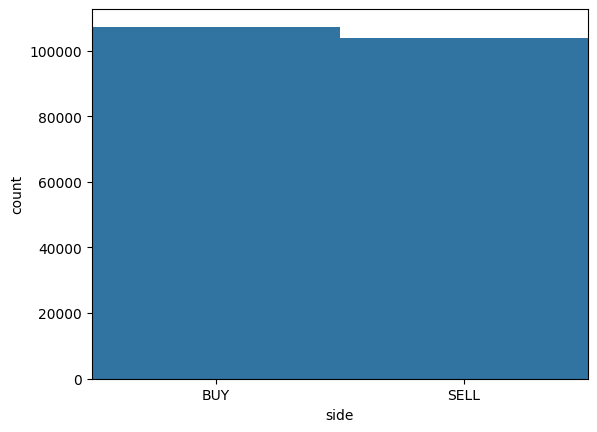

In [60]:
sns.countplot(data= df_data, x= df_data['side'], width=1.0, orient='x')
plt.show()

# Top 3 Traded Coins

1. **1000PEPE:** 1000Pepe
2. **ETH:** Ethereum
3. **BTC:** Bitcoin

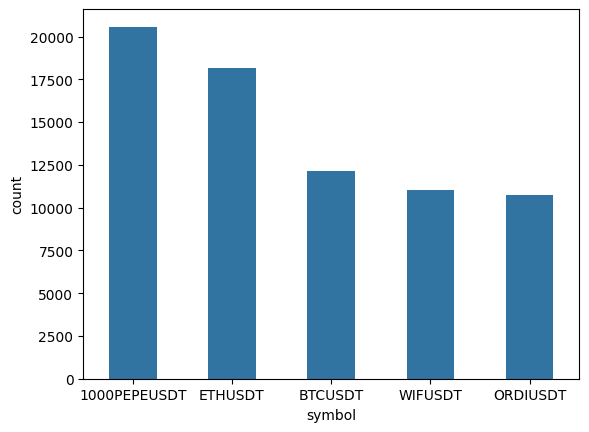

In [61]:
sns.countplot(data=df_data[df_data['symbol'].isin(df_data['symbol'].value_counts().nlargest(5).index)], x=df_data['symbol'], width=0.6, gap= 0.2, order=df_data['symbol'].value_counts().nlargest(5).index)
plt.show()

# Plot method from Seaborn 

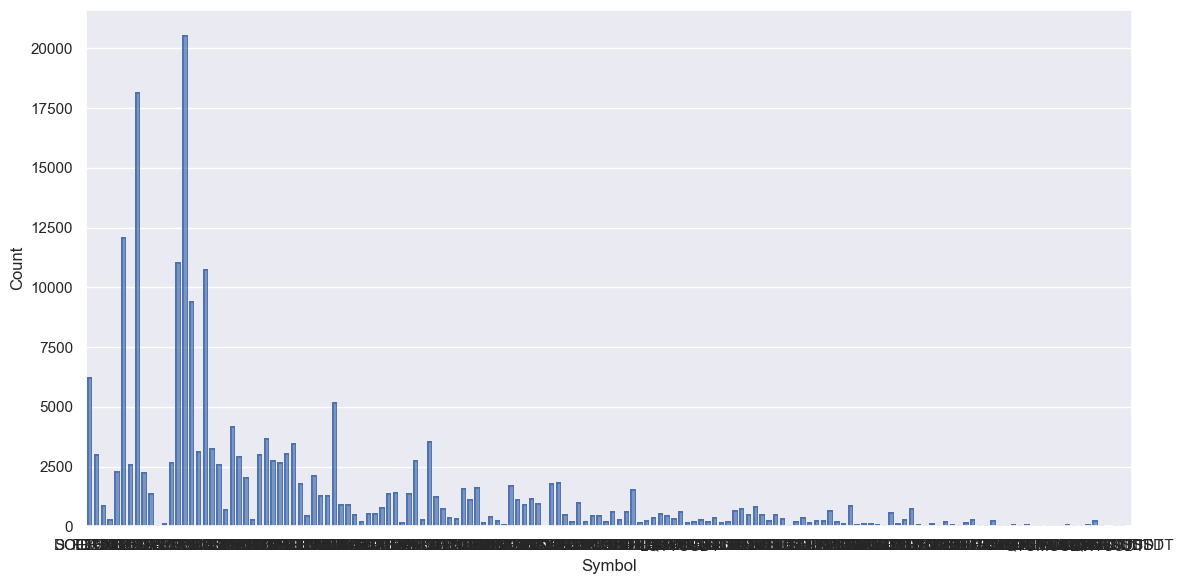

In [62]:
import seaborn.objects as so  

so.Plot(df_data, x="symbol").add(so.Bar(), so.Count()).layout(size=(12, 6)).label(x="Symbol", y="Count").show()

# Metrics to Calculate:

### 1. ROI (Return on Investment) 
### 2. PnL (Profit and Loss) 
### 3. Sharpe Ratio 
### 4. MDD (Maximum Drawdown) 
### 5. Win Rate 
### 6. Win Positions 
### 7. Total Positions 

In [63]:
df_data

,Port_IDs,time,symbol,side,price,fee,feeAsset,quantity,quantityAsset,realizedProfit,realizedProfitAsset,baseAsset,qty,positionSide,activeBuy
0,3925368433214965504,2024-06-20 21:37:36,SOLUSDT,BUY,132.537000,-0.994027,USDT,1988.055000,USDT,0.0,USDT,SOL,15.0,LONG,True
1,3925368433214965504,2024-06-20 21:36:58,DOGEUSDT,BUY,0.121820,-0.279796,USDT,1398.980880,USDT,0.0,USDT,DOGE,11484.0,LONG,False
2,3925368433214965504,2024-06-20 21:36:58,DOGEUSDT,BUY,0.121820,-0.039494,USDT,197.470220,USDT,0.0,USDT,DOGE,1621.0,LONG,False
3,3925368433214965504,2024-06-20 21:36:56,DOGEUSDT,BUY,0.121820,-0.008284,USDT,16.567520,USDT,0.0,USDT,DOGE,136.0,LONG,True
4,3925368433214965504,2024-06-20 21:36:56,DOGEUSDT,BUY,0.121820,-0.046109,USDT,92.217740,USDT,0.0,USDT,DOGE,757.0,LONG,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211272,3768170840939476993,2024-06-16 20:27:55,JASMYUSDT,SELL,0.035968,-0.025070,USDT,50.139392,USDT,0.0,USDT,JASMY,1394.0,BOTH,False
211273,3768170840939476993,2024-06-16 20:27:55,JASMYUSDT,SELL,0.035968,-0.008255,USDT,16.509312,USDT,0.0,USDT,JASMY,459.0,BOTH,False
211274,3768170840939476993,2024-06-16 20:27:55,JASMYUSDT,SELL,0.035969,-0.031545,USDT,63.089626,USDT,0.0,USDT,JASMY,1754.0,BOTH,False
211275,3768170840939476993,2024-06-16 20:27:55,JASMYUSDT,SELL,0.035969,-0.031905,USDT,63.809006,USDT,0.0,USDT,JASMY,1774.0,BOTH,False


In [68]:
df_data.rename(columns={"Port_IDs": "account_id", "time": "timestamp", "symbol": "trading_symbol", "side": "transaction_side", "price": "trade_price", "fee": "transaction_fee",
                         "feeAsset": "fee_asset", "quantity": "trade_quantity", "quantityAsset": "quantity_asset", "realizedProfit": "realized_profit", 
                         "realizedProfitAsset": "realized_profit_asset", "baseAsset": "base_asset", "qty": "quantity", "positionSide": "position_side",
                         "activeBuy": "active_buy", "invested_amount": "invested_amount"}, inplace=True)



In [69]:
df_data

,account_id,timestamp,trading_symbol,transaction_side,trade_price,transaction_fee,fee_asset,trade_quantity,quantity_asset,realized_profit,realized_profit_asset,base_asset,quantity,position_side,active_buy
0,3925368433214965504,2024-06-20 21:37:36,SOLUSDT,BUY,132.537000,-0.994027,USDT,1988.055000,USDT,0.0,USDT,SOL,15.0,LONG,True
1,3925368433214965504,2024-06-20 21:36:58,DOGEUSDT,BUY,0.121820,-0.279796,USDT,1398.980880,USDT,0.0,USDT,DOGE,11484.0,LONG,False
2,3925368433214965504,2024-06-20 21:36:58,DOGEUSDT,BUY,0.121820,-0.039494,USDT,197.470220,USDT,0.0,USDT,DOGE,1621.0,LONG,False
3,3925368433214965504,2024-06-20 21:36:56,DOGEUSDT,BUY,0.121820,-0.008284,USDT,16.567520,USDT,0.0,USDT,DOGE,136.0,LONG,True
4,3925368433214965504,2024-06-20 21:36:56,DOGEUSDT,BUY,0.121820,-0.046109,USDT,92.217740,USDT,0.0,USDT,DOGE,757.0,LONG,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211272,3768170840939476993,2024-06-16 20:27:55,JASMYUSDT,SELL,0.035968,-0.025070,USDT,50.139392,USDT,0.0,USDT,JASMY,1394.0,BOTH,False
211273,3768170840939476993,2024-06-16 20:27:55,JASMYUSDT,SELL,0.035968,-0.008255,USDT,16.509312,USDT,0.0,USDT,JASMY,459.0,BOTH,False
211274,3768170840939476993,2024-06-16 20:27:55,JASMYUSDT,SELL,0.035969,-0.031545,USDT,63.089626,USDT,0.0,USDT,JASMY,1754.0,BOTH,False
211275,3768170840939476993,2024-06-16 20:27:55,JASMYUSDT,SELL,0.035969,-0.031905,USDT,63.809006,USDT,0.0,USDT,JASMY,1774.0,BOTH,False


# Calculating Return On Investment (ROI)

## Method:
### Sum of realized profits divided by the total cost of trades (entry price × quantity). 
Note: Add Rates/Fees if Neccessary 

In [70]:
import warnings 

warnings.filterwarnings("ignore")

In [71]:
df_data["invested_amount"] = df_data["trade_price"] * df_data["trade_quantity"]

In [72]:
grouped = df_data.groupby("account_id")

In [73]:
roi = grouped.apply(lambda x: (x["realized_profit"].sum() / x["invested_amount"].sum()) * 100)
roi = roi.rename('ROI %').reset_index()

In [74]:
roi

,account_id,ROI %
0,3672754654734989568,0.000061
1,3733192481840423936,0.000005
2,3768170840939476993,0.042017
3,3784403294629753856,0.000716
4,3786761687746711808,0.000007
...,...,...
144,4039279455324236544,1.838226
145,4040382575336130560,0.000000
146,4040843843196854529,0.000278
147,4041804592937345281,-0.000049


In [75]:
roi.nlargest(20, 'ROI %')

,account_id,ROI %
58,3977234346014419201,36.530497
119,4030708912786799105,23.212538
102,4023697433751327232,22.824929
110,4029506971304830209,21.967939
81,4004713168329653760,19.885897
61,3983074113875692800,18.787880
103,4023697881318718465,15.042600
111,4029507714735307777,10.764962
16,3891020560590657281,6.798006
144,4039279455324236544,1.838226


# Profit and Loss 

In [76]:
profit = df_data.groupby('account_id')['realized_profit'].sum()


In [77]:
profit = profit.rename('total_profit').reset_index()

In [78]:
profit

,account_id,total_profit
0,3672754654734989568,566.597660
1,3733192481840423936,2923.977200
2,3768170840939476993,243.668899
3,3784403294629753856,2521.814305
4,3786761687746711808,205.021400
...,...,...
144,4039279455324236544,1038.807419
145,4040382575336130560,0.000000
146,4040843843196854529,2151.704060
147,4041804592937345281,-776.343000


In [79]:
profit.nlargest(20, 'total_profit')

,account_id,total_profit
96,4020204877254599680,71998.855953
75,3999240873283311617,42574.473679
98,4021669203289716224,26427.331592
50,3960874214179953664,19567.471286
17,3907081197088384000,18015.997370
107,4028701921959171840,17601.401398
48,3956076827719377409,16790.012238
62,3986814617275053313,16337.461881
99,4022565861939831809,14197.577076
5,3788465932399412480,13960.966457


# Sharpe Ratio 

Sharpe Ratio (Risk-Adjusted Return)

Method Detials:

1. Used for risk-adjusted return calculations.
2. The risk-free rate is often assumed as 0 in crypto trading.
3. Daily returns are typically calculated using (ProfitndLoss / Initial Investment).


In [80]:
df_data['return'] = df_data['realized_profit'] / df_data['invested_amount']

In [81]:
risk_rate = 0.0


In [82]:
sharpe_ratio = df_data.groupby('account_id').apply(lambda x: (x['return'].mean() - risk_rate) / x['return'].std())
sharpe_ratio = sharpe_ratio.rename('sharpe ratio').reset_index()

In [83]:
sharpe_ratio.nlargest(20, 'sharpe ratio')

,account_id,sharpe ratio
1,3733192481840423936,1.332030
47,3956048468100538880,1.055677
127,4032403303704824321,0.933112
133,4035430878731345664,0.856423
2,3768170840939476993,0.834513
144,4039279455324236544,0.823177
148,4041860229502600193,0.786586
134,4036548677626662656,0.735282
48,3956076827719377409,0.702144
61,3983074113875692800,0.681550


# MDD Maximum DrawDown

## Method Details: 

**1. Measures the largest peak-to-through drop in portfolio value.** <br/>
**2. Helps understand worst-case losses.**

In [84]:

df_data['cumm_return'] = df_data.groupby('account_id')['realized_profit'].cumsum()


df_data['max'] = df_data.groupby('account_id')['cumm_return'].cummax()

# MDD as Drawdown 
df_data['drawdown'] = ((df_data['cumm_return'] - df_data['max']) / df_data['max'])


In [85]:
mdd_per_id = df_data.groupby('account_id')['drawdown'].min().reset_index().rename(columns={'drawdown': 'MDD'})
mdd_per_id

,account_id,MDD
0,3672754654734989568,-0.460781
1,3733192481840423936,-0.760355
2,3768170840939476993,0.000000
3,3784403294629753856,-0.177261
4,3786761687746711808,-2.318212
...,...,...
144,4039279455324236544,0.000000
145,4040382575336130560,NaN
146,4040843843196854529,0.000000
147,4041804592937345281,-46.067384


# Winning Trades 

In [86]:
wins = df_data.groupby('account_id').apply(lambda x: (x['realized_profit'] > 0).sum() / len(x))
wins = wins.rename('win_per_id').reset_index()

In [87]:
wins

,account_id,win_per_id
0,3672754654734989568,0.443038
1,3733192481840423936,0.802612
2,3768170840939476993,0.428571
3,3784403294629753856,0.302314
4,3786761687746711808,0.451220
...,...,...
144,4039279455324236544,0.553517
145,4040382575336130560,0.000000
146,4040843843196854529,0.322034
147,4041804592937345281,0.230978


In [88]:
wins.nlargest(20, 'win_per_id')

,account_id,win_per_id
1,3733192481840423936,0.802612
62,3986814617275053313,0.782217
14,3886752488982104320,0.745396
47,3956048468100538880,0.714286
88,4013955990069013504,0.659218
16,3891020560590657281,0.647597
17,3907081197088384000,0.613971
8,3826087012661391104,0.583333
92,4017110277719148289,0.567460
77,4000222729738650369,0.560543


# Win Positions 

## Method:
**Count the number of profitable positions (profit > 0)**

In [89]:
win_positions =  df_data.groupby('account_id').apply(lambda x: (x['realized_profit'] > 0).sum())
win_positions = win_positions.rename('win_positions').reset_index()

In [90]:
win_positions.nlargest(20, 'win_positions')

,account_id,win_positions
15,3887577207880438784,2893
62,3986814617275053313,2780
37,3944088772635000577,2774
78,4000877324693233921,2714
100,4022641794255717633,2634
17,3907081197088384000,2540
27,3931992636670880512,2430
75,3999240873283311617,2366
86,4011626972687000576,2326
97,4021243448368889856,2290


# Total Positions 

## Method:
**Return the count of Total trades**

In [91]:
total_positions = df_data.groupby('account_id').size().reset_index(name='total_positions')

In [92]:
total_positions

,account_id,total_positions
0,3672754654734989568,474
1,3733192481840423936,689
2,3768170840939476993,14
3,3784403294629753856,6050
4,3786761687746711808,82
...,...,...
144,4039279455324236544,327
145,4040382575336130560,76
146,4040843843196854529,59
147,4041804592937345281,368


In [93]:
total_positions.nlargest(20, "total_positions")

,account_id,total_positions
40,3946087913459823360,6085
37,3944088772635000577,6063
86,4011626972687000576,6056
100,4022641794255717633,6052
71,3995532094997544704,6051
3,3784403294629753856,6050
15,3887577207880438784,6050
27,3931992636670880512,6050
63,3987739404272887297,6050
78,4000877324693233921,6050


Determine feature importance and create a scoring system with weighted scores. Ranking Algorithm:

Develop an algorithm to rank accounts based on calculated metrics.

In [104]:
# Before performing feature Importance, we need all the metrics in the single Dataframe, so we can predict ROI 

In [95]:
# roi, profit, wins, win_positions, sharpe_ratio , total_positions mdd_per_id

In [97]:
metrics_df  = pd.concat([profit, wins, win_positions, sharpe_ratio , total_positions, mdd_per_id,roi], axis=1).loc[:,~pd.concat([profit, wins, win_positions, sharpe_ratio , total_positions, mdd_per_id,roi], axis=1).columns.duplicated()]
metrics_df

,account_id,total_profit,win_per_id,win_positions,sharpe ratio,total_positions,MDD,ROI %
0,3672754654734989568,566.597660,0.443038,210,0.006576,474,-0.460781,0.000061
1,3733192481840423936,2923.977200,0.802612,553,1.332030,689,-0.760355,0.000005
2,3768170840939476993,243.668899,0.428571,6,0.834513,14,0.000000,0.042017
3,3784403294629753856,2521.814305,0.302314,1829,0.051780,6050,-0.177261,0.000716
4,3786761687746711808,205.021400,0.451220,37,0.254007,82,-2.318212,0.000007
...,...,...,...,...,...,...,...,...
144,4039279455324236544,1038.807419,0.553517,181,0.823177,327,0.000000,1.838226
145,4040382575336130560,0.000000,0.000000,0,NaN,76,NaN,0.000000
146,4040843843196854529,2151.704060,0.322034,19,0.675033,59,0.000000,0.000278
147,4041804592937345281,-776.343000,0.230978,85,-0.537710,368,-46.067384,-0.000049


In [98]:
metrics_df.isna().sum()

account_id         0
total_profit       0
win_per_id         0
win_positions      0
sharpe ratio       1
total_positions    0
MDD                1
ROI %              0
dtype: int64

In [102]:
metrics_df.dropna(subset=['sharpe ratio', 'MDD'], inplace=True)
metrics_df

,account_id,total_profit,win_per_id,win_positions,sharpe ratio,total_positions,MDD,ROI %
0,3672754654734989568,566.597660,0.443038,210,0.006576,474,-0.460781,0.000061
1,3733192481840423936,2923.977200,0.802612,553,1.332030,689,-0.760355,0.000005
2,3768170840939476993,243.668899,0.428571,6,0.834513,14,0.000000,0.042017
3,3784403294629753856,2521.814305,0.302314,1829,0.051780,6050,-0.177261,0.000716
4,3786761687746711808,205.021400,0.451220,37,0.254007,82,-2.318212,0.000007
...,...,...,...,...,...,...,...,...
143,4039129759104249600,1264.289200,0.443609,59,0.546219,133,0.000000,0.233903
144,4039279455324236544,1038.807419,0.553517,181,0.823177,327,0.000000,1.838226
146,4040843843196854529,2151.704060,0.322034,19,0.675033,59,0.000000,0.000278
147,4041804592937345281,-776.343000,0.230978,85,-0.537710,368,-46.067384,-0.000049


In [103]:
metrics_df.isna().sum()


account_id         0
total_profit       0
win_per_id         0
win_positions      0
sharpe ratio       0
total_positions    0
MDD                0
ROI %              0
dtype: int64

In [202]:
metrics_df.to_csv('metrics.csv')

In [ ]:
# account_id	total_profit	win_per_id	win_positions	sharpe ratio	total_positions	MDD	ROI %

# Both Random Forest and XGBoost are ensemble learning models that excel in ranking and feature importance

## We use Random Forest for Feature Importance and XGB for Ranking using Learn to Rank algo 

In [168]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler

features = ["total_profit", "win_per_id", "win_positions", "sharpe ratio", "total_positions", "MDD"]

model_df = metrics_df[np.isfinite(metrics_df).all(1)] # As the values are too large


X = model_df[features]
y = model_df["ROI %"] # Provisional (Subject to change based on objectives)

In [169]:
# scaling, better to use Minmax as we have large values 
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X) 

In [170]:
# For feature importance we take Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_scaled, y)

# Get feature importances using in-built model 
feature_importance = pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)
print(feature_importance)

win_positions      0.352292
total_positions    0.246297
win_per_id         0.173563
total_profit       0.140811
sharpe ratio       0.085065
MDD                0.001972
dtype: float64


In [171]:
feature_importance.dtypes

dtype('float64')

In [172]:
# we add these float values to list and create a dataframe for visualization and understanding
importances_df = pd.DataFrame(list(feature_importance.items()), columns=["Feature", "Importance"])
importances_df = importances_df.sort_values(by="Importance", ascending=False)
importances_df

,Feature,Importance
0,win_positions,0.352292
1,total_positions,0.246297
2,win_per_id,0.173563
3,total_profit,0.140811
4,sharpe ratio,0.085065
5,MDD,0.001972


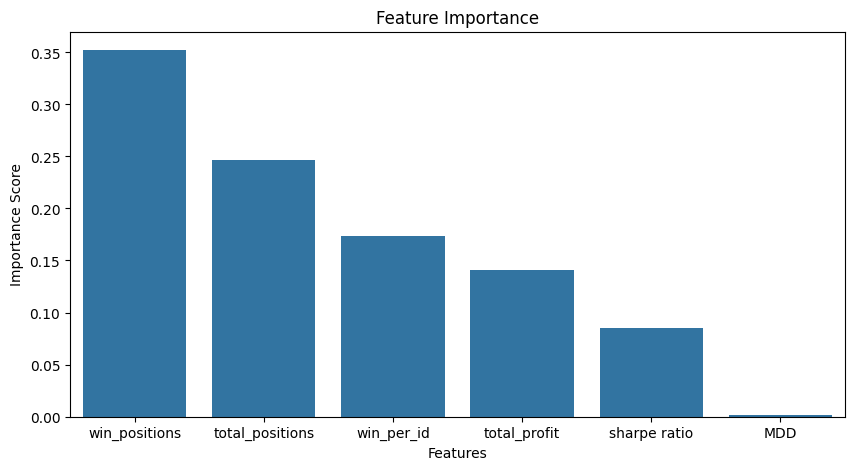

In [173]:
plt.figure(figsize=(10, 5))
sns.barplot(data=importances_df, x="Feature", y="Importance")
plt.ylabel("Importance Score")
plt.xlabel("Features")
plt.title("Feature Importance")
plt.show()

## The scores calculated using normalization were quite high and not very relevant to ROI. However, it was just an experiment.


In [195]:
# Normalize feature importance
weights = feature_importance / feature_importance.sum()

ranking_features = ["win_positions", "win_per_id", "total_positions", "sharpe ratio", "total_profit", "MDD"]

# Compute the weighted score for each account
model_df["score"] = model_df[ranking_features].mul(weights[ranking_features], axis=1).sum(axis=1)
model_df['score']

model_df["rank"] = model_df["score"].rank(method="dense", ascending=False) # same pandas method

print(rank_df[["account_id", "score", "rank"]])


              account_id       score   rank
96   4020204877254599680  478.307379    1.0
75   3999240873283311617  334.342278    2.0
17   3907081197088384000  215.553743    3.0
62   3986814617275053313  211.919548    4.0
48   3956076827719377409  188.264067    5.0
..                   ...         ...    ...
20   3911997667197443328    4.629706  135.0
4    3786761687746711808    3.028493  136.0
13   3880920727367689984    2.032659  137.0
147  4041804592937345281    2.015912  138.0
2    3768170840939476993    1.561588  139.0

[139 rows x 3 columns]


In [196]:
model_df.nsmallest(5,'rank') # Some issue ROI is less but stil the rank is high.

,account_id,total_profit,win_per_id,win_positions,sharpe ratio,total_positions,MDD,ROI %,score,rank
96,4020204877254599680,71998.855953,0.329421,1993,0.145414,6050,-8.028348,0.000005,12330.513445,1.0
75,3999240873283311617,42574.473679,0.523220,2366,0.578777,4522,-0.052816,0.099811,7942.380900,2.0
17,3907081197088384000,18015.997370,0.613971,2540,0.112277,4137,-0.242908,0.038348,4450.723076,3.0
98,4021669203289716224,26427.331592,0.313912,528,-0.076650,1682,-0.161568,0.000011,4321.593410,4.0
62,3986814617275053313,16337.461881,0.782217,2780,0.382749,3554,-0.000149,0.092214,4155.378228,5.0


In [197]:
rank_df['rank'].head(20)

96      1.0
75      2.0
17      3.0
62      4.0
48      5.0
27      6.0
37      7.0
15      8.0
98      9.0
50     10.0
86     11.0
63     12.0
93     13.0
100    14.0
5      15.0
35     16.0
97     17.0
33     18.0
3      19.0
56     20.0
Name: rank, dtype: float64

# Machine Learning-Based Ranking (Learning-to-Rank)

In [198]:
from xgboost import XGBRegressor

X = model_df[ranking_features]
y = model_df["ROI %"]  # Target variable

model = XGBRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

model_df["score"] = model.predict(X)

model_df["rank"] = model_df["score"].rank(ascending=False, method="dense") # using pandas rank method 
model_df['rank']

score = model.score(X, y)
print("Model Score:", score)

Model Score: 0.9999999716103919


## The Score and ROI will match since the training and prediction data are identical. If the model is tested with unseen data, the results might still be closely aligned.


In [199]:
model_df.nsmallest(20, 'rank')

,account_id,total_profit,win_per_id,win_positions,sharpe ratio,total_positions,MDD,ROI %,score,rank
58,3977234346014419201,2427.292831,0.397590,33,0.656545,83,0.000000,36.530497,36.527103,1.0
119,4030708912786799105,1612.843770,0.033333,2,0.183943,60,0.000000,23.212538,23.211296,2.0
102,4023697433751327232,2408.224000,0.095238,4,0.320314,42,0.000000,22.824929,22.825165,3.0
110,4029506971304830209,2413.654000,0.057692,3,0.240056,52,-0.001585,21.967939,21.967890,4.0
81,4004713168329653760,1667.198610,0.074074,2,0.277525,27,0.000000,19.885897,19.885517,5.0
61,3983074113875692800,2424.829520,0.325581,14,0.681550,43,0.000000,18.787880,18.786610,6.0
103,4023697881318718465,3151.950620,0.085714,6,0.273948,70,0.000000,15.042600,15.042068,7.0
111,4029507714735307777,1537.899960,0.037736,2,0.167491,53,0.000000,10.764962,10.764904,8.0
16,3891020560590657281,2856.300564,0.647597,283,0.628814,437,0.000000,6.798006,6.796956,9.0
144,4039279455324236544,1038.807419,0.553517,181,0.823177,327,0.000000,1.838226,1.838618,10.0


In [200]:
final_output = model_df.nsmallest(20, 'rank')[["account_id", "ROI %", "rank"]]

# Final Rankings of Account Holders Based on ROI <br/>
## 
We utilized metrics to determine the importance for ROI and then employed a machine learning model to rank the account holders accordingl.


In [201]:
final_output

,account_id,ROI %,rank
58,3977234346014419201,36.530497,1.0
119,4030708912786799105,23.212538,2.0
102,4023697433751327232,22.824929,3.0
110,4029506971304830209,21.967939,4.0
81,4004713168329653760,19.885897,5.0
61,3983074113875692800,18.787880,6.0
103,4023697881318718465,15.042600,7.0
111,4029507714735307777,10.764962,8.0
16,3891020560590657281,6.798006,9.0
144,4039279455324236544,1.838226,10.0
